### Problem Statement: Based on given features predict whether the patient can get attack or not

### Concept: Decision Trees and Random Forest

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [7]:
df=pd.read_csv('data/heart_disease_health_indicators_BRFSS2015.csv')

In [8]:
df.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [9]:
df.shape

(253680, 22)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   Diabetes              253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [11]:
df.isna().sum()

HeartDiseaseorAttack    0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
Diabetes                0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [12]:
df.describe()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.094186,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.296921,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.292087,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.698160,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,2.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [16]:
pd.set_option('display.max_columns', None)
df.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [14]:
df.HeartDiseaseorAttack.value_counts()

0.0    229787
1.0     23893
Name: HeartDiseaseorAttack, dtype: int64

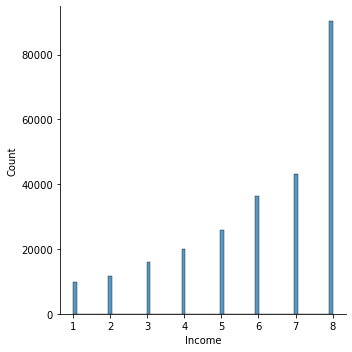

In [19]:
sns.displot(df['Income'])
plt.show()

In [24]:
X=df.drop('HeartDiseaseorAttack',axis=1)
y=df['HeartDiseaseorAttack']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_CV dataset: ", X_cv.shape)
print("Number transactions y_CV dataset: ", y_cv.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (202944, 21)
Number transactions y_train dataset:  (202944,)
Number transactions X_CV dataset:  (50736, 21)
Number transactions y_CV dataset:  (50736,)
Number transactions X_test dataset:  (50736, 21)
Number transactions y_test dataset:  (50736,)


### Decision Tree

In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score

In [77]:
t_score=[]
v_score=[]
for i in range(1,30):
    dtcl=DecisionTreeClassifier(max_depth=i,random_state=0,class_weight={0:0.5,1:5.3})
    dtcl.fit(X_train,y_train)
    cv_pred=dtcl.predict(X_cv)
    test_pred=dtcl.predict(X_train)
    t_score.append(f1_score(y_train,test_pred))
    v_score.append(f1_score(y_cv,cv_pred))
    

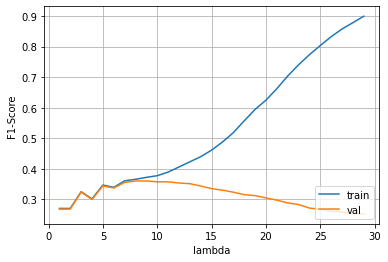

In [76]:
plt.figure()
plt.plot(np.arange(1,30), t_score, label="train")
plt.plot(np.arange(1,30), v_score, label="val")
plt.legend(loc='lower right')
plt.xlabel("lambda")
plt.ylabel("F1-Score")
plt.grid()
plt.show()

### Model with best depth

In [128]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, precision_recall_curve,classification_report

dtcl=DecisionTreeClassifier(max_depth=10,random_state=0,class_weight={0:0.5,1:5})
dtcl.fit(X_train,y_train)
y_cv_pred=dtcl.predict(X_cv)

print(f1_score(y_cv,y_cv_pred))
print("======================")
print(confusion_matrix(y_cv,y_cv_pred))
print("======================")
print(classification_report(y_cv,y_cv_pred))

0.356223376866545
[[33178 12790]
 [  963  3805]]
              precision    recall  f1-score   support

         0.0       0.97      0.72      0.83     45968
         1.0       0.23      0.80      0.36      4768

    accuracy                           0.73     50736
   macro avg       0.60      0.76      0.59     50736
weighted avg       0.90      0.73      0.78     50736



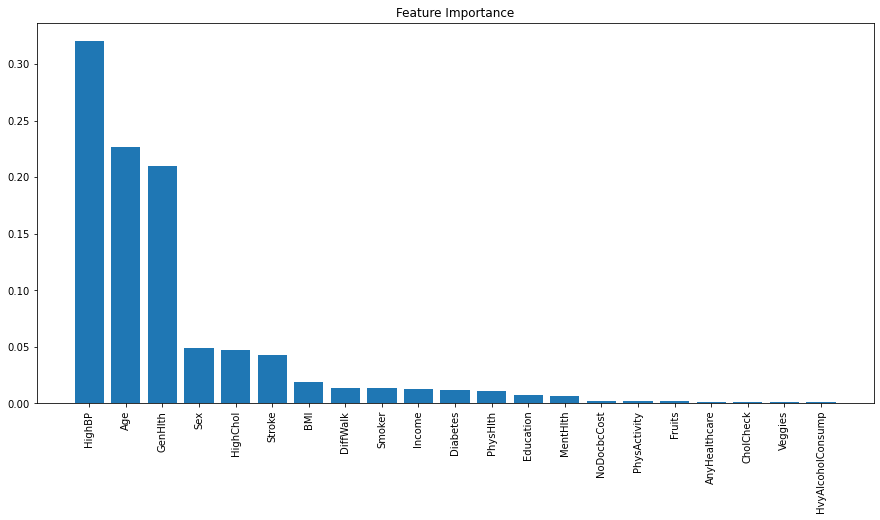

In [100]:
importances = dtcl.feature_importances_
indices = np.argsort(importances)[::-1] # Sort feature importances in descending order
names = [X_train.columns[i] for i in indices] # Rearrange feature names so they match the sorted feature importances
plt.figure(figsize=(15, 7)) # Create plot
plt.title("Feature Importance") # Create plot title
plt.bar(range(X_train.shape[1]), importances[indices]) # Add bars
plt.xticks(range(X_train.shape[1]), names, rotation=90) # Add feature names as x-axis labels
plt.show() # Show plot

### Random Forest

In [135]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,precision_recall_curve,classification_report,accuracy_score


In [137]:
v_sc=[]
t_sc=[]

for depth in range(1,20):
    rf=RandomForestClassifier(max_depth=depth,max_samples=.75,class_weight={0:0.5,1:5},random_state=0)
    rf.fit(X_train,y_train)
    y_cv_pred=rf.predict(X_cv)
    v_sc.append(f1_score(y_cv,y_cv_pred))
    y_tr_pred=rf.predict(X_train)
    t_sc.append(f1_score(y_train,y_tr_pred))

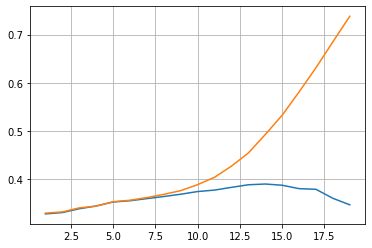

In [141]:
plt.plot(np.arange(1,20),v_sc,label="Test")
plt.plot(np.arange(1,20),t_sc,label="Validation")
plt.grid()
plt.show()

In [144]:
rf=RandomForestClassifier(max_depth=12.5,max_samples=.75,class_weight={0:0.5,1:5},random_state=0)
rf.fit(X_train,y_train)
y_cv_pred=rf.predict(X_cv)

print(f1_score(y_cv,y_cv_pred))
print("======================")
print(confusion_matrix(y_cv,y_cv_pred))
print("======================")
print(classification_report(y_cv,y_cv_pred))

0.382672256261421
[[35690 10278]
 [ 1208  3560]]
              precision    recall  f1-score   support

         0.0       0.97      0.78      0.86     45968
         1.0       0.26      0.75      0.38      4768

    accuracy                           0.77     50736
   macro avg       0.61      0.76      0.62     50736
weighted avg       0.90      0.77      0.82     50736



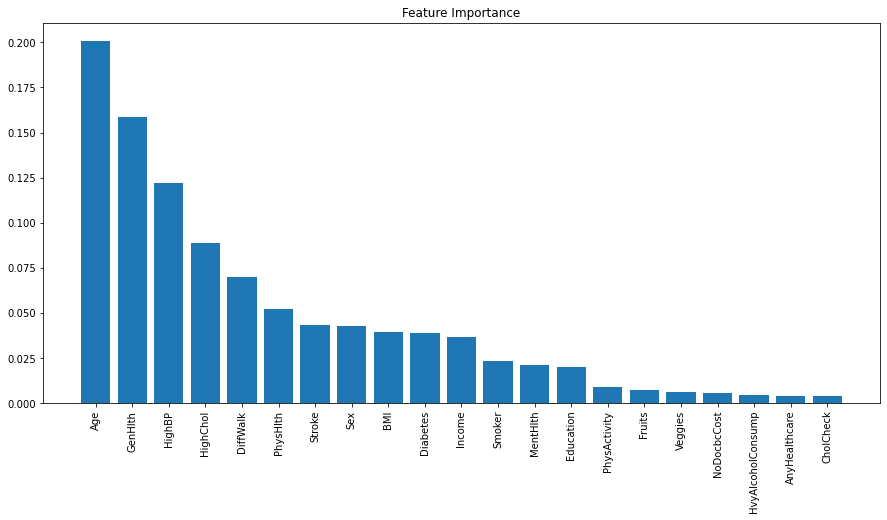

In [145]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1] # Sort feature importances in descending order
names = [X_train.columns[i] for i in indices] # Rearrange feature names so they match the sorted feature importances
plt.figure(figsize=(15, 7)) # Create plot
plt.title("Feature Importance") # Create plot title
plt.bar(range(X_train.shape[1]), importances[indices]) # Add bars
plt.xticks(range(X_train.shape[1]), names, rotation=90) # Add feature names as x-axis labels
plt.show() # Show plot